# Ion excitation with a short Fourier-limited Gaussian laser pulse
CERN, 2021

From the Mathematica notebook of Simon Rochester:

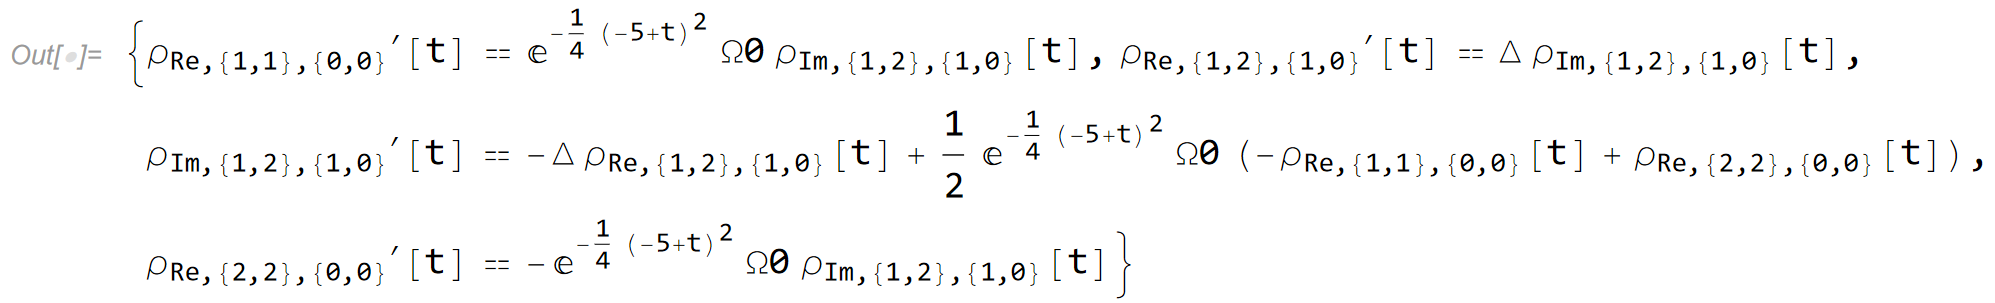

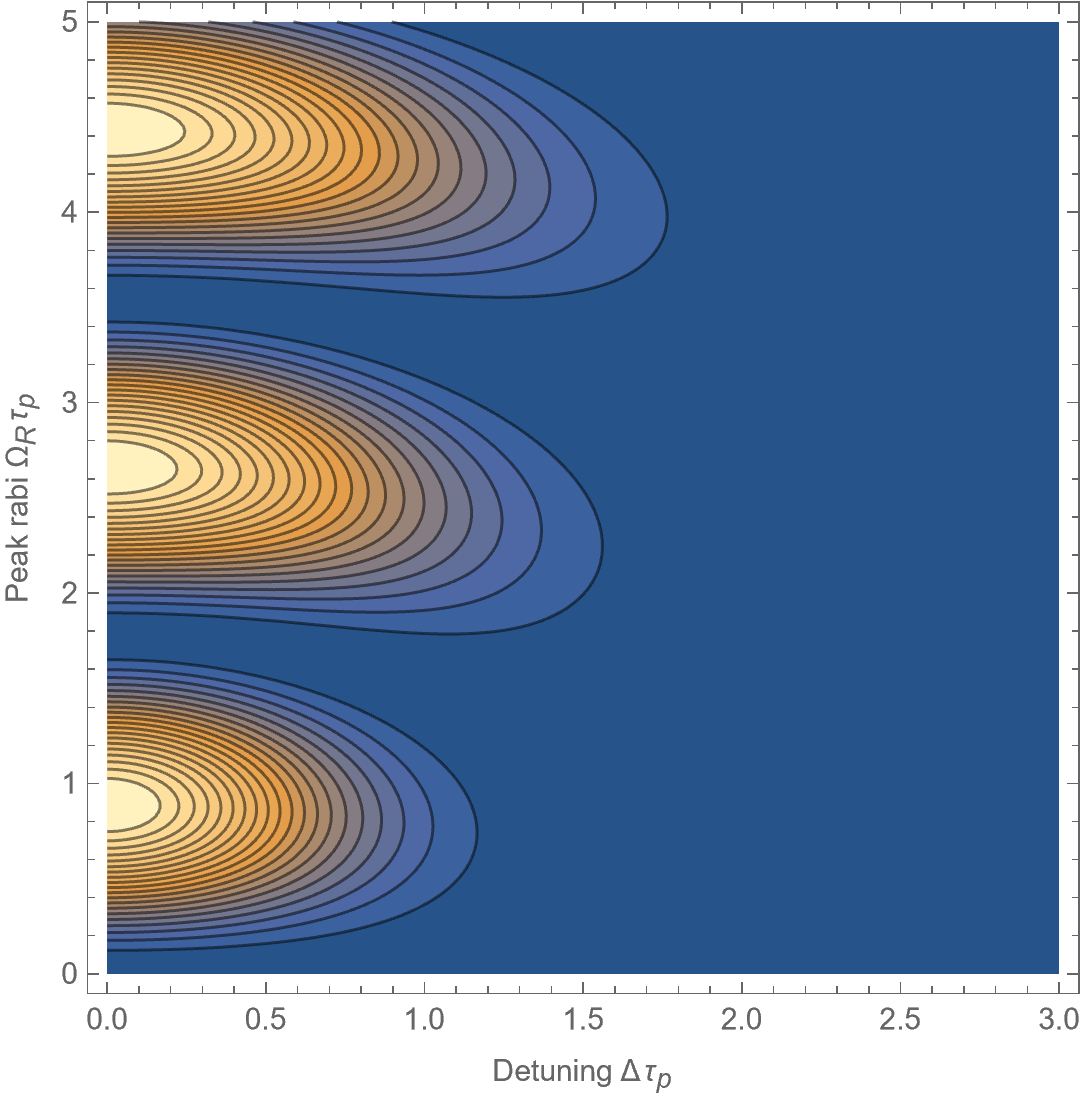

Let's use numeric integration to solve this system of equations:

In [1]:
import numpy as np
from scipy.integrate import solve_ivp

Initial values:

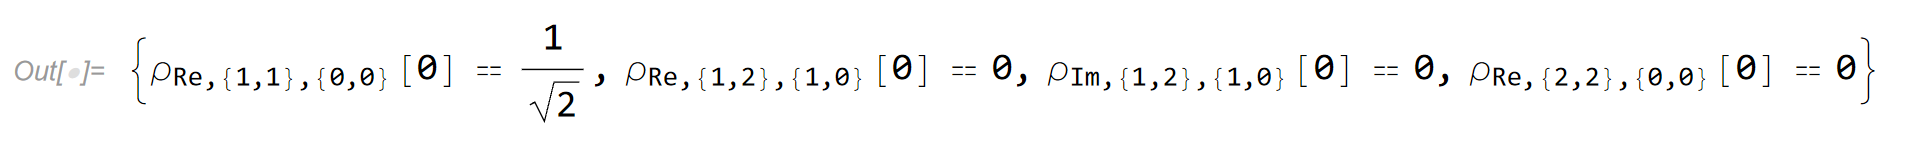

In [2]:
rhoRe1100 = 1/np.sqrt(2);
rhoRe1210 = 0
rhoIm1210 = 0
rhoRe2200 = 0
rho0 = np.array([rhoRe1100,rhoRe1210,rhoIm1210,rhoRe2200])

We solve the equation
$$
\frac{d\boldsymbol{\rho}}{dt} = \boldsymbol{F}(t,\boldsymbol{\rho}).
$$

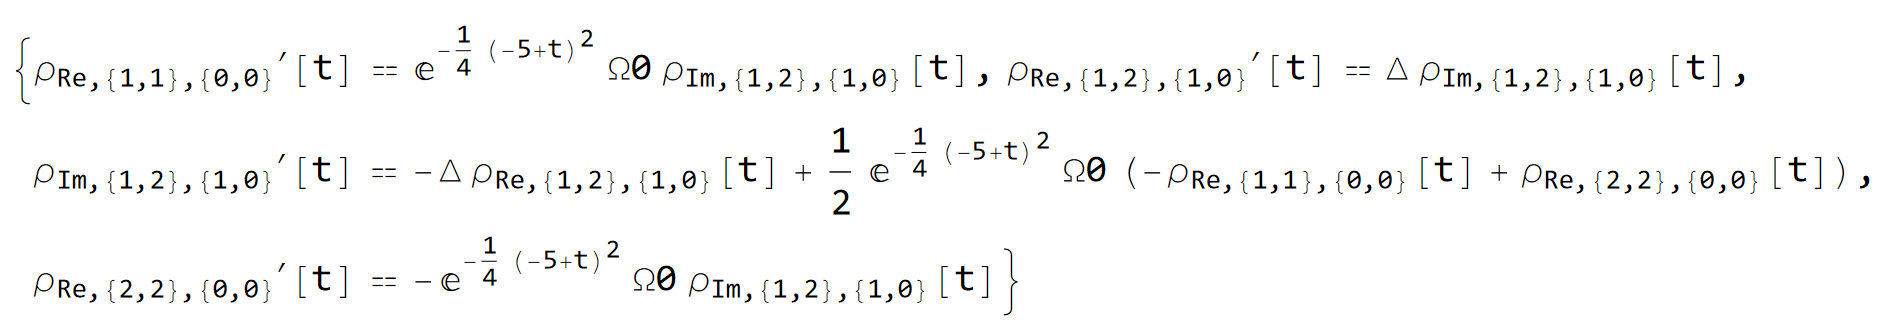

In [3]:
Delta=0; Omega0=5
def F(t,rho):
    # Delta -- Laser frequency detuning from the ion resonance
    # Omega0 -- Peak Raby frequency
    rhoRe1100 = rho[0]
    rhoRe1210 = rho[1]
    rhoIm1210 = rho[2]
    rhoRe2200 = rho[3]
    Exp = np.exp(-(1/4)*(-5+t)**2)
    return np.array([
         Exp*Omega0*rhoIm1210,
         Delta*rhoIm1210,
        -Delta*rhoRe1210 + 0.5*Exp*Omega0*(-rhoRe1100 + rhoRe2200),
        -Exp*Omega0*rhoIm1210
    ])

#F(0,rho0)

In [4]:
t_span = (0, 10) # sec

t_eval = np.linspace(t_span[0], t_span[1], 500) # points of output

In [5]:
sol = solve_ivp(F, t_span, rho0, t_eval=t_eval, rtol=1e-4)

CPU times: user 7.15 ms, sys: 1.21 ms, total: 8.36 ms
Wall time: 7.4 ms


## Plot the evolution

In [6]:
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = pio.templates["simple_white"]
pio.templates.default['layout']['xaxis']['showgrid'] = True
pio.templates.default['layout']['yaxis']['showgrid'] = True

In [7]:
rhoRe1100, rhoRe1210, rhoIm1210, rhoRe2200 = sol.y

In [8]:
fig = go.Figure()

fig.add_trace( go.Scatter(x=t_eval, y=rhoRe2200*np.sqrt(2), mode='lines',
                          line_width=3, line_color="blue"))

fig.update_xaxes(title_text=r"$t\ (\tau_p)$")
fig.update_yaxes(title_text=r"$\rho_{Re,\{2,2\},\{0,0\}}$")

fig.show(renderer="png")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

## Map of resulting excitation as a function of $\Delta_d$ and $\Omega_0$

In [ ]:
def excite_ion(newDelta,newOmega0):
    global Delta;  Delta  = newDelta
    global Omega0; Omega0 = newOmega0
    sol = solve_ivp(F, t_span, rho0, rtol=1e-4)
    rhoRe1100, rhoRe1210, rhoIm1210, rhoRe2200 = sol.y
    return rhoRe2200[-1]*np.sqrt(2)

excite_ion(0,5)

In [ ]:
Delta_range  = np.linspace(0, +3, 30)
Omega0_range = np.linspace(0, +8, 80)
Deltas, Omega0s = np.meshgrid(Delta_range, Omega0_range)

In [ ]:
Excitation = np.vectorize(excite_ion)(Deltas, Omega0s)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data =
    go.Contour(
        z=Excitation,
        x=Delta_range, # horizontal axis
        y=Omega0_range, # vertical axis
        zmin=0.0,
        zmax=1.0,
        colorscale='reds',
        contours=dict(
            start=0,
            end=1,
            size=0.1,
        ),        
    ))

fig.update_xaxes(title_text=r"$\Delta_d\tau_p$")
fig.update_yaxes(title_text=r"$\Omega_R\tau_p$")

fig.show(renderer="png")

In [ ]:
# Heatmap version:
fig = go.Figure(data =
    go.Heatmap(
        z=Excitation,
        x=Delta_range, # horizontal axis
        y=Omega0_range, # vertical axis
        zmin=0.0,
        zmax=1.0,
        colorscale='reds', 
    ))

fig.update_xaxes(range=(0,Delta_range[-1]), title_text=r"$\Delta_d\tau_p$")
fig.update_yaxes(range=(0,Omega0_range[-1]), title_text=r"$\Omega_R\tau_p$")

fig.show(renderer="png")

In [ ]:
import json

# Saving data

with open('map_of_excitation.json', "w") as f:
    json.dump({
        'Delta_detuning*tau_pulse max': Delta_range[-1],
        'OmegaRabi*tau_pulse max': Omega0_range[-1],
        'Excitation probability': Excitation.tolist()
    }, f, indent=1)

print('Saved.')

Data structure:

In [ ]:
Excitation

In [ ]:
np.shape(Excitation)

In [ ]:
Deltas

In [ ]:
Omega0s